# Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
os_path_base = "/kaggle/input/ieee-fraud-detection"

#### 3. Load the CSV files as ‘train_transaction.csv’

In [3]:
path_data = os.path.join(os_path_base, "train_transaction.csv")
df = pd.read_csv(path_data)
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4. From train_transaction keep 10000 entries: the first 9700 non-fraud entries and the first 300 fraud entries in dataset reduced_transaction_df


In [4]:
df_non_fraud = df[df["isFraud"] == 0][:9700]
print(df_non_fraud.shape)
df_non_fraud.head(3)

(9700, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_fraud = df[df["isFraud"] == 1][:300]
print(df_fraud.shape)
df_fraud.head(3)

(300, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
reduced_transaction_df = pd.concat([df_non_fraud, df_fraud], ignore_index=True)
reduced_transaction_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2998003,1,330244,54.0,W,3507,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,2998019,1,330423,150.0,H,3821,111.0,150.0,mastercard,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,2998035,1,330738,171.0,W,4993,553.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,2998043,1,330852,39.0,W,16727,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **I/ Data set observation**

#### 5. Print the head of the dataset


In [7]:
reduced_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 6. List following information for the training set
1. Column number
2. Column names (all should be visible in a line, not in a column)
3. Length of the data set
4. For each column name, its type (show all values)

In [8]:
column_number = len(reduced_transaction_df.columns)
column_number

394

In [9]:
column_names = list(reduced_transaction_df.columns)
print(', '.join(map(str, column_names)))

TransactionID, isFraud, TransactionDT, TransactionAmt, ProductCD, card1, card2, card3, card4, card5, card6, addr1, addr2, dist1, dist2, P_emaildomain, R_emaildomain, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12, D13, D14, D15, M1, M2, M3, M4, M5, M6, M7, M8, M9, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, V38, V39, V40, V41, V42, V43, V44, V45, V46, V47, V48, V49, V50, V51, V52, V53, V54, V55, V56, V57, V58, V59, V60, V61, V62, V63, V64, V65, V66, V67, V68, V69, V70, V71, V72, V73, V74, V75, V76, V77, V78, V79, V80, V81, V82, V83, V84, V85, V86, V87, V88, V89, V90, V91, V92, V93, V94, V95, V96, V97, V98, V99, V100, V101, V102, V103, V104, V105, V106, V107, V108, V109, V110, V111, V112, V113, V114, V115, V116, V117, V118, V119, V120, V121, V122, V123, V124, V125, V126, V127, V128, V129, V130,

In [10]:
df_len = reduced_transaction_df.shape[0]
df_len

10000

In [11]:
column_types = [reduced_transaction_df[col].dtypes.name for col in column_names]
col_print = 5
for i in range(len(column_names) // col_print):
    for j in range(col_print):
        print(f"{column_names[i*col_print+j]}: {column_types[i*col_print+j]}", end="\t\t")
    print()

TransactionID: int64		isFraud: int64		TransactionDT: int64		TransactionAmt: float64		ProductCD: object		
card1: int64		card2: float64		card3: float64		card4: object		card5: float64		
card6: object		addr1: float64		addr2: float64		dist1: float64		dist2: float64		
P_emaildomain: object		R_emaildomain: object		C1: float64		C2: float64		C3: float64		
C4: float64		C5: float64		C6: float64		C7: float64		C8: float64		
C9: float64		C10: float64		C11: float64		C12: float64		C13: float64		
C14: float64		D1: float64		D2: float64		D3: float64		D4: float64		
D5: float64		D6: float64		D7: float64		D8: float64		D9: float64		
D10: float64		D11: float64		D12: float64		D13: float64		D14: float64		
D15: float64		M1: object		M2: object		M3: object		M4: object		
M5: object		M6: object		M7: object		M8: object		M9: object		
V1: float64		V2: float64		V3: float64		V4: float64		V5: float64		
V6: float64		V7: float64		V8: float64		V9: float64		V10: float64		
V11: float64		V12: float64		V13: float64		V14: float64

#### 7. Control the correct extraction of transaction: number of non-fraudulent transactions, number of fraudulent transactions, rate of fraudulent transactions

In [12]:
nb_nonfraud = reduced_transaction_df[reduced_transaction_df["isFraud"] == 0].shape[0]
nb_fraud = reduced_transaction_df[reduced_transaction_df["isFraud"] == 1].shape[0]
rate_fraud = nb_fraud / df_len

print(f"number of non-fraudulent transactions : {nb_nonfraud}")
print(f"number of fraudulent transactions : {nb_fraud}")
print(f"rate of fraudulent transactions : {rate_fraud}")

number of non-fraudulent transactions : 9700
number of fraudulent transactions : 300
rate of fraudulent transactions : 0.03


#### 8. Which columns are categories? List them (show all column names); extract and show existing values.

In [13]:
category_columns = ['ProductCD', 'card1', 'card2', 'card3',
                    'card5', 'addr1', 'addr2', 'P_emaildomain',
                    'R_emaildomain', 'M1','M2', 'M3', 'M4',
                    'M5', 'M6', 'M7', 'M8', 'M9']
print("Columns that are categories:", category_columns)

Columns that are categories: ['ProductCD', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


#### 9. Which columns are numeric? List them (show all column names); extract and show min, max, mean, median and standard deviation values

In [14]:
numeric_columns = reduced_transaction_df.select_dtypes(include='number').columns
print("Columns that are categories:", numeric_columns.values)

Columns that are categories: ['TransactionID' 'isFraud' 'TransactionDT' 'TransactionAmt' 'card1'
 'card2' 'card3' 'card5' 'addr1' 'addr2' 'dist1' 'dist2' 'C1' 'C2' 'C3'
 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2'
 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14' 'D15'
 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'V29' 'V30' 'V31' 'V32' 'V33' 'V34' 'V35' 'V36' 'V37'
 'V38' 'V39' 'V40' 'V41' 'V42' 'V43' 'V44' 'V45' 'V46' 'V47' 'V48' 'V49'
 'V50' 'V51' 'V52' 'V53' 'V54' 'V55' 'V56' 'V57' 'V58' 'V59' 'V60' 'V61'
 'V62' 'V63' 'V64' 'V65' 'V66' 'V67' 'V68' 'V69' 'V70' 'V71' 'V72' 'V73'
 'V74' 'V75' 'V76' 'V77' 'V78' 'V79' 'V80' 'V81' 'V82' 'V83' 'V84' 'V85'
 'V86' 'V87' 'V88' 'V89' 'V90' 'V91' 'V92' 'V93' 'V94' 'V95' 'V96' 'V97'
 'V98' 'V99' 'V100' 'V101' 'V102' 'V103' 'V104' 'V105' 'V106' 'V107'
 'V108' 'V109' 'V110' 'V111' 'V112' 'V

#### 10. For each column, print the rate of undefined values (NaN for numeric)

In [15]:
def compute_rate_nan(df, printable=True):
    nan_rates = []
    column_names = list(df.columns)
    
    for i, col in zip(range(1, len(column_names)+1), column_names):
        nan_rate = df[df[col].isna()].shape[0] / df.shape[0]
        if (printable):
            print(f"{col}: {nan_rate}", end="\t")
        if (i % 5 == 0 and printable):
            print()
            
        nan_rates.append(nan_rate)
    return nan_rates

rate_nan = compute_rate_nan(reduced_transaction_df)

TransactionID: 0.0	isFraud: 0.0	TransactionDT: 0.0	TransactionAmt: 0.0	ProductCD: 0.0	
card1: 0.0	card2: 0.0121	card3: 0.0001	card4: 0.0001	card5: 0.0023	
card6: 0.0001	addr1: 0.0915	addr2: 0.0915	dist1: 0.6618	dist2: 0.9625	
P_emaildomain: 0.2099	R_emaildomain: 0.8366	C1: 0.0	C2: 0.0	C3: 0.0	
C4: 0.0	C5: 0.0	C6: 0.0	C7: 0.0	C8: 0.0	
C9: 0.0	C10: 0.0	C11: 0.0	C12: 0.0	C13: 0.0	
C14: 0.0	D1: 0.0	D2: 0.4585	D3: 0.4283	D4: 0.6232	
D5: 0.7234	D6: 0.9507	D7: 0.9775	D8: 0.8898	D9: 0.8898	
D10: 0.1268	D11: 0.7732	D12: 0.9593	D13: 0.972	D14: 0.9544	
D15: 0.494	M1: 0.5794	M2: 0.5794	M3: 0.5794	M4: 0.4879	
M5: 0.5788	M6: 0.2579	M7: 0.7868	M8: 0.7868	M9: 0.7868	
V1: 0.7732	V2: 0.7732	V3: 0.7732	V4: 0.7732	V5: 0.7732	
V6: 0.7732	V7: 0.7732	V8: 0.7732	V9: 0.7732	V10: 0.7732	
V11: 0.7732	V12: 0.1269	V13: 0.1269	V14: 0.1269	V15: 0.1269	
V16: 0.1269	V17: 0.1269	V18: 0.1269	V19: 0.1269	V20: 0.1269	
V21: 0.1269	V22: 0.1269	V23: 0.1269	V24: 0.1269	V25: 0.1269	
V26: 0.1269	V27: 0.1269	V28: 0.1269	V29: 0.1

#### 11. For each numerical column, print the rate of zero (0) value
Typ:
- First transform the content of the DataFrame column into a list before counting the quantity of a given item : <br>
```python
zero_number = list(reduced_dtransac[colunm]).count(0)
```

In [16]:
for i, col in zip(range(1, len(column_names)+1), column_names):
    rate_zero = list(reduced_transaction_df[col]).count(0) / df_len
    print(f"{col}: {rate_zero}", end="\t")
    if (i % 5 == 0):
        print()

TransactionID: 0.0	isFraud: 0.97	TransactionDT: 0.0	TransactionAmt: 0.0	ProductCD: 0.0	
card1: 0.0	card2: 0.0	card3: 0.0	card4: 0.0	card5: 0.0	
card6: 0.0	addr1: 0.0	addr2: 0.0	dist1: 0.0313	dist2: 0.0036	
P_emaildomain: 0.0	R_emaildomain: 0.0	C1: 0.0007	C2: 0.0003	C3: 0.991	
C4: 0.8347	C5: 0.6029	C6: 0.1013	C7: 0.9094	C8: 0.7806	
C9: 0.2987	C10: 0.7899	C11: 0.0005	C12: 0.9087	C13: 0.0497	
C14: 0.0503	D1: 0.4531	D2: 0.0221	D3: 0.1317	D4: 0.1105	
D5: 0.0492	D6: 0.0315	D7: 0.0073	D8: 0.0015	D9: 0.0075	
D10: 0.3396	D11: 0.0667	D12: 0.0275	D13: 0.0231	D14: 0.0347	
D15: 0.1184	M1: 0.0	M2: 0.0	M3: 0.0	M4: 0.0	
M5: 0.0	M6: 0.0	M7: 0.0	M8: 0.0	M9: 0.0	
V1: 0.0004	V2: 0.0004	V3: 0.0004	V4: 0.0552	V5: 0.0529	
V6: 0.0004	V7: 0.0004	V8: 0.0004	V9: 0.0004	V10: 0.1105	
V11: 0.1099	V12: 0.524	V13: 0.4998	V14: 0.0002	V15: 0.8385	
V16: 0.8385	V17: 0.8364	V18: 0.8364	V19: 0.3874	V20: 0.3797	
V21: 0.8369	V22: 0.8369	V23: 0.0005	V24: 0.0005	V25: 0.2209	
V26: 0.2205	V27: 0.8718	V28: 0.8718	V29: 0.5782	V30:

## **II/ Data set visualisation**

#### 12. Visualise the dataset using dimensions: 'TransactionAmt', 'card1','addr1'.
Typs:
- Create a dedicated visualisation function
```python
show3D_transation_data(transac_dataset, x_axis_name, y_axis_name, z_axis_name)
```
- Use code from Anomaly Detection_Use_Case.

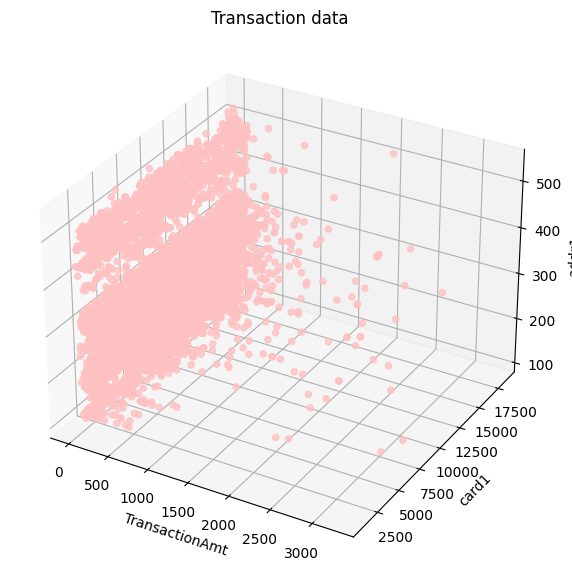

In [17]:
def show3D_transaction_data(transac_dataset, x_axis_name, y_axis_name, z_axis_name, figsize=(10, 7)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_title("Transaction data")
    ax.scatter(transac_dataset[x_axis_name], transac_dataset[y_axis_name], transac_dataset[z_axis_name],
               color="#FFC1C1", marker='o', alpha=0.8)
    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)
    
    plt.show()
    
show3D_transaction_data(reduced_transaction_df, 'TransactionAmt', 'card1', 'addr1')
                            

#### 13. Create an alternate visualisation function for visualising fraud entries only, in red
```python
show3D_transation_data _fraud_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name)
```

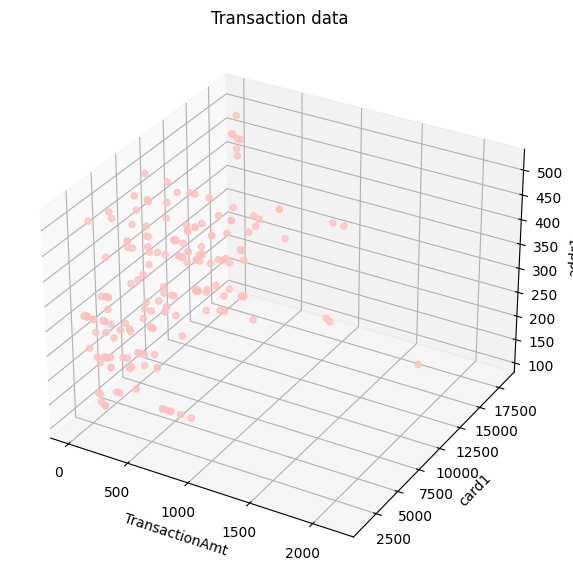

In [18]:
def show3D_transation_data_fraud_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name, figsize=(10, 7)):
    transac_fraud = transac_dataset[transac_dataset["isFraud"] == 1]
    show3D_transaction_data(transac_fraud, x_axis_name, y_axis_name, z_axis_name, figsize)
    
show3D_transation_data_fraud_only(reduced_transaction_df, 'TransactionAmt', 'card1', 'addr1')

## **III/ Data cleaning**

#### 14. Perform one-hot encoding of categorical data

In [19]:
def get_one_hot_encoded_dataframe(df):
    """
    Retrieves the one hot encoded dataframe
    Args :
        dataframe: input dataframe
    Returns :
        The associated one hot encoded dataframe
    """
    if (df is None):
        return None
    
    return pd.get_dummies(df)

one_hot_categorical = get_one_hot_encoded_dataframe(reduced_transaction_df[category_columns])
one_hot_categorical

,card1,card2,card3,card5,addr1,addr2,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,13926,NaN,150.0,142.0,315.0,87.0,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,2755,404.0,150.0,102.0,325.0,87.0,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,4663,490.0,150.0,166.0,330.0,87.0,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
3,18132,567.0,150.0,117.0,476.0,87.0,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,4497,514.0,150.0,102.0,420.0,87.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3507,NaN,150.0,226.0,204.0,87.0,False,False,False,False,...,False,True,False,True,True,False,True,False,False,True
9996,3821,111.0,150.0,219.0,264.0,87.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,4993,553.0,150.0,226.0,123.0,87.0,False,False,False,False,...,False,True,False,True,False,True,False,True,False,True
9998,16727,111.0,150.0,226.0,204.0,87.0,False,False,False,False,...,False,True,True,False,True,False,True,False,False,True


Adding the one_categories to the dataframe

In [20]:
transaction_df = reduced_transaction_df.drop(columns=category_columns)
transaction_df = pd.concat([transaction_df, one_hot_categorical], axis=1)
transaction_df.shape

(10000, 492)

#### 15. Remove NaN (Not a number) values by imputation of the mean of the column
Typs:
- Do not forget to transform the resulting data structure in Pandas Dataframe again
- Do not forget to keep the column names for the Dataframe

In [21]:
def remove_nan_through_mean_imputation(df):
    """
    Remove NaN (Not a Number) entries through mean imputation
    Args :
        dataframe: input dataframe
    Return :
        the dataframe with  NaN (Not a Number) entries replaced using mean imputation
    """
    if (df is None):
        return None
    
    object_columns = df.select_dtypes(include=["object"]).columns

    for col in object_columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
    
    numeric_columns = df.select_dtypes(include='number').columns
    df = df.fillna(df[numeric_columns].mean())
    #df = df.fillna(df.mean())
    return df.dropna()

transaction_df = remove_nan_through_mean_imputation(transaction_df)
transaction_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,card4,card6,dist1,dist2,C1,C2,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,2987000,0,86400,68.5,discover,credit,19.000000,292.621333,1.0,1.0,...,True,False,False,True,False,False,False,False,False,False
1,2987001,0,86401,29.0,mastercard,credit,116.262567,292.621333,1.0,1.0,...,False,True,False,True,False,False,False,False,False,False
2,2987002,0,86469,59.0,visa,debit,287.000000,292.621333,1.0,1.0,...,True,False,True,False,True,False,True,False,True,False
3,2987003,0,86499,50.0,mastercard,debit,116.262567,292.621333,2.0,5.0,...,False,True,True,False,False,False,False,False,False,False
4,2987004,0,86506,50.0,mastercard,credit,116.262567,292.621333,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2998003,1,330244,54.0,visa,credit,48.000000,292.621333,3.0,3.0,...,False,True,False,True,True,False,True,False,False,True
9996,2998019,1,330423,150.0,mastercard,credit,116.262567,292.621333,3.0,3.0,...,False,False,False,False,False,False,False,False,False,False
9997,2998035,1,330738,171.0,visa,credit,0.000000,292.621333,3.0,3.0,...,False,True,False,True,False,True,False,True,False,True
9998,2998043,1,330852,39.0,visa,credit,41.000000,292.621333,3.0,3.0,...,False,True,True,False,True,False,True,False,False,True


#### 16. Control that no NaN value remain in the dataframe

In [22]:
rate_nan = np.array(compute_rate_nan(transaction_df, printable=False))
assert (rate_nan == np.zeros(rate_nan.shape[0])).all()

rate_nan

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## **IV/ Outlier detection**

### **Isolation forest**

The **Isolation Forest** algorithm is a machine learning method primarily used for anomaly detection. It operates on the principle that anomalies are rare and different data points, and hence, they are easier to "isolate" than normal data points.

#### How Does It Work?

1. **Building a Forest**:
   - The Isolation Forest constructs multiple isolation trees, akin to decision trees. 
   - To build a tree, it first selects a random subset of the dataset.
   - It then recursively divides the subset by randomly choosing a feature and a split value. This division continues until only one observation remains or a certain maximum tree length is reached.

2. **Isolation**:
   - Anomalies tend to have shorter paths (from root to leaf) in the tree, as they require fewer splits to be isolated compared to normal points. Thus, observations deemed as anomalies will have shorter path lengths on average across the forest.
   
3. **Anomaly Score**:
   - Once the forest is built, each observation can be evaluated by passing it through the trees and computing an average path length.
   - The shorter this length, the higher the anomaly score, indicating the observation is likely an anomaly.

#### Points to Note:

- **Efficiency**: Isolation Forest is especially efficient for high-dimensional datasets.
  
- **Type of Anomalies**: It's effective at detecting "global" anomalies, i.e., data points that are radically different from the rest. For "local" anomalies (points that are anomalous only in a small neighborhood), techniques like LOF (Local Outlier Factor) might be more appropriate.

- **Key Parameters**: The primary hyperparameters of the Isolation Forest are the number of trees to construct and the maximum size of each tree.

The Isolation Forest is a powerful tool for anomaly detection due to its simplicity and efficiency, especially for large-dimensional datasets.

---

#### 17. Extract outliers using sklearn.ensemble.IsolationForest, using and_outliers_fraction = 0.03. Control the numbers of outliers.
Typs:
- clf.predict() returns outliers marked as -1
- Add an additional column ‘outliers’ to your dataframe as follows to store outlier status:
```python
X_with_imputed_values_outliers['if_outliers'] = dtransac_outliers
```
- How many outliers found in unsupervised manner are labelled as fraudulent transactions
(‘isFraud’) ?
- Print fraudulent outliers. What do you observe?

In [23]:
isolation_forest = IsolationForest(contamination=rate_fraud, random_state=42)
isolation_forest.fit(transaction_df.select_dtypes(exclude=["object"]))
outliers = isolation_forest.predict(transaction_df.select_dtypes(exclude=["object"]))
outliers.shape

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(10000,)

In [24]:
transaction_df['if_outliers'] = outliers
global_outliers = transaction_df[(transaction_df['isFraud'] == True) & (transaction_df['if_outliers'] == -1)]
print(f"Number outliers found in unsupervised manner which are labelled as fraudulent transactions : {global_outliers.shape[0]}")
global_outliers

Number outliers found in unsupervised manner which are labelled as fraudulent transactions : 29


,TransactionID,isFraud,TransactionDT,TransactionAmt,card4,card6,dist1,dist2,C1,C2,...,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,if_outliers
9702,2987243,1,90246,37.098,visa,credit,116.262567,292.621333,1.0,1.0,...,False,False,False,False,False,False,False,False,False,-1
9703,2987245,1,90295,37.098,visa,credit,116.262567,292.621333,2.0,1.0,...,False,False,False,False,False,False,False,False,False,-1
9704,2987288,1,90986,155.521,visa,credit,116.262567,292.621333,1.0,1.0,...,False,False,False,False,False,False,False,False,False,-1
9706,2987405,1,92999,90.570,mastercard,credit,116.262567,292.621333,1.0,1.0,...,False,False,False,False,False,False,False,False,False,-1
9707,2987630,1,97843,12.326,mastercard,debit,116.262567,7.000000,1.0,2.0,...,False,False,False,False,False,False,False,False,False,-1
9708,2987683,1,99584,124.344,mastercard,debit,116.262567,7.000000,1.0,3.0,...,False,False,False,False,False,False,False,False,False,-1
9711,2987780,1,102188,10.000,mastercard,debit,116.262567,292.621333,35.0,29.0,...,False,False,False,False,False,False,False,False,False,-1
9712,2987781,1,102193,10.000,mastercard,debit,116.262567,292.621333,35.0,29.0,...,False,False,False,False,False,False,False,False,False,-1
9713,2987869,1,106603,83.380,visa,credit,116.262567,9.000000,1.0,4.0,...,False,False,False,False,False,False,False,False,False,-1
9737,2988706,1,137934,450.000,visa,credit,116.262567,292.621333,3.0,3.0,...,False,False,False,False,False,False,False,False,False,-1


#### 18. Create yet another visualisation function for visualising IsolationForest outliers entries only, in red
```python
show3D_transation_data_if_outliers_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name)
```

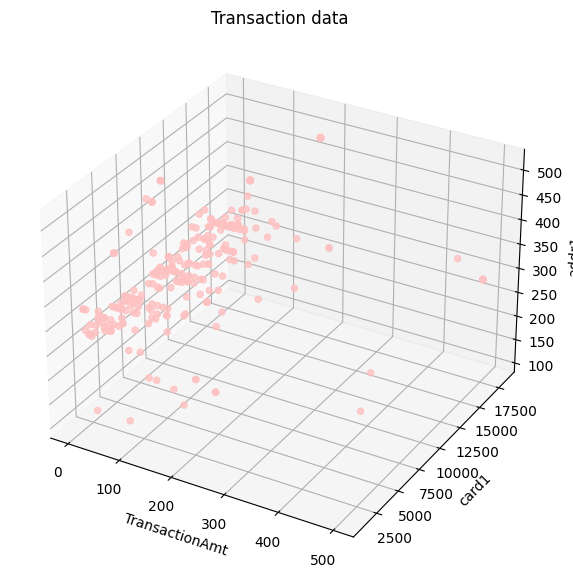

In [25]:
def show3D_transation_data_if_outliers_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name, figsize=(10, 7)):
    transac_outliers = transac_dataset[transac_dataset["if_outliers"] == -1]
    show3D_transaction_data(transac_outliers, x_axis_name, y_axis_name, z_axis_name, figsize)
    
show3D_transation_data_if_outliers_only(transaction_df, 'TransactionAmt', 'card1', 'addr1')

In [26]:
transaction_df[(transaction_df['isFraud'] == True) & (transaction_df['if_outliers'] == -1)][['addr1', 'addr2', 'dist1', 'dist2']]

,addr1,addr2,dist1,dist2
9702,292.408035,87.006935,116.262567,292.621333
9703,292.408035,87.006935,116.262567,292.621333
9704,292.408035,87.006935,116.262567,292.621333
9706,292.408035,87.006935,116.262567,292.621333
9707,292.408035,87.006935,116.262567,7.000000
9708,292.408035,87.006935,116.262567,7.000000
9711,441.000000,87.000000,116.262567,292.621333
9712,441.000000,87.000000,116.262567,292.621333
9713,292.408035,87.006935,116.262567,9.000000
9737,325.000000,87.000000,116.262567,292.621333


A lot of transaction frauds was made at the same address

### **Local Outlier Factor (LOF)**

The **Local Outlier Factor (LOF)** algorithm is another popular method for anomaly detection, especially in datasets where the anomalies have a different density than the normal data. It works well for detecting anomalies that may not be extreme values but are unusual in their local context.

#### **Local Outlier Factor (LOF) - Explanation:**

##### **1. Concept:**
- **Local Density:** LOF compares the local density of a data point to its neighbors. 
- **Relative Measure:** It's a relative measure. A data point is considered as an outlier if its local density is significantly lower than that of its neighbors.

##### **2. Computation:**
- **k-Nearest Neighbors:** For each data point, its k-nearest neighbors are found, and the distance to the k-th nearest neighbor is used as a local radius.
- **Local Reachability Density (LRD):** For each data point, compute its LRD, which is the inverse of the average reachability distance from the data point to its k-nearest neighbors.
  - **Reachability Distance:** It's defined as the maximum of the actual distance between two points and the local radius of the second point. This ensures that points inside the local radius of their neighbors get a stable reachability distance.
- **LOF Score:** For each data point, its LOF score is computed as the average ratio of the LRDs of its k-nearest neighbors to its own LRD. 
  - An LOF score around 1 indicates that the data point has a similar density as its neighbors.
  - An LOF score significantly greater than 1 indicates that the data point is in a sparser region than its neighbors, thus being an outlier.

##### **3. Interpretation:**
- Unlike global methods that provide an absolute score of "outlierness", LOF provides a relative score. This means that whether a point is an outlier is determined not just by its own local properties but also by the properties of its neighbors.
- LOF excels in situations where the dataset has varying densities.

##### **4. Pros and Cons:**
- **Pros:**
  - Can detect local outliers.
  - Doesn't assume any distribution on the data.
  - Effective in datasets of varying densities.
- **Cons:**
  - Can be sensitive to the choice of the parameter k (number of neighbors).
  - Computationally more expensive compared to global methods.

#### 19. Extract outliers using sklearn.neighbors. LocalOutlierFactor, using and outliers_fraction = 0.03. Control the numbers of outliers.
Typs:
- clf.predict() returns outliers marked as -1
- Add an additional column ‘lof_outliers’ to your dataframe as follows to store outlier status:
```python
X_with_imputed_values_outliers['lof_outliers'] = lof_outliers
```
- How many outliers found in unsupervised manner are labelled as fraudulent transactions
(‘isFraud’) ?

In [27]:
local_outlier_factor = LocalOutlierFactor(n_neighbors=20, contamination=rate_fraud)
local_outliers = local_outlier_factor.fit_predict(transaction_df.select_dtypes(exclude=["object"]))

local_outliers.shape

(10000,)

In [28]:
transaction_df['lof_outliers'] = local_outliers
fraud_and_outliers = transaction_df[(transaction_df['isFraud'] == True) & (transaction_df["lof_outliers"] == -1)]
print(f"Number outliers found in unsupervised manner which are labelled as fraudulent transactions : {fraud_and_outliers.shape[0]}")


Number outliers found in unsupervised manner which are labelled as fraudulent transactions : 17


In [29]:
fraud_and_outliers

,TransactionID,isFraud,TransactionDT,TransactionAmt,card4,card6,dist1,dist2,C1,C2,...,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,if_outliers,lof_outliers
9713,2987869,1,106603,83.380,visa,credit,116.262567,9.000000,1.0,4.0,...,False,False,False,False,False,False,False,False,-1,-1
9718,2988081,1,117398,2161.000,visa,debit,773.000000,292.621333,3.0,5.0,...,True,False,True,False,True,False,True,False,1,-1
9740,2988992,1,141351,994.000,visa,debit,2.000000,292.621333,1.0,2.0,...,False,True,False,True,False,True,False,True,1,-1
9755,2989635,1,148007,30.029,visa,credit,116.262567,292.621333,0.0,4.0,...,False,False,False,False,False,False,False,False,1,-1
9789,2991258,1,163586,140.000,visa,debit,116.262567,292.621333,5.0,3.0,...,True,False,False,False,False,False,False,False,1,-1
9884,2994713,1,243140,150.000,visa,debit,116.262567,292.621333,4.0,4.0,...,True,False,False,False,False,False,False,False,1,-1
9903,2995267,1,250589,633.920,visa,credit,116.262567,292.621333,1.0,1.0,...,False,True,False,False,False,False,False,False,1,-1
9905,2995311,1,251273,667.840,visa,credit,8.000000,292.621333,1.0,1.0,...,False,True,False,False,False,False,False,False,1,-1
9908,2995369,1,252105,600.000,visa,credit,116.262567,292.621333,1.0,1.0,...,False,True,False,False,False,False,False,False,1,-1
9909,2995387,1,252367,667.540,visa,credit,8.000000,292.621333,1.0,1.0,...,False,True,False,False,False,False,False,False,1,-1


### 20. Create yet another visualisation function for visualising LOF outliers entries only, in red
```python
show3D_transation_data_lof_outliers_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name)
```


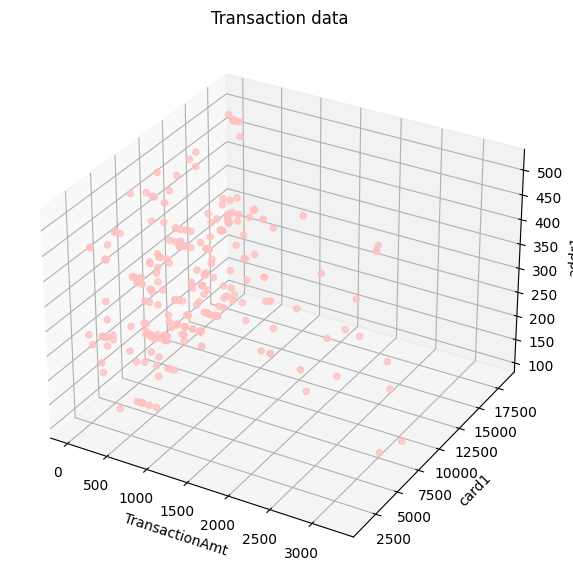

In [30]:
def show3D_transation_data_lof_outliers_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name, figsize=(10, 7)):
    transac_outliers = transac_dataset[transac_dataset["lof_outliers"] == -1]
    show3D_transaction_data(transac_outliers, x_axis_name, y_axis_name, z_axis_name, figsize)
    
show3D_transation_data_lof_outliers_only(transaction_df, 'TransactionAmt', 'card1', 'addr1')
    

### **Comparison of IsolationForest and LOF**

#### 21. Control the complementarity between the 2 algorithms
1. How many outliers are common to IsolationForest and LOF?
2. What do you deduce for building unsupervised outlier detectors?

In [31]:
common = transaction_df[(transaction_df['if_outliers'] == -1) & (transaction_df["lof_outliers"] == -1)]
print(transaction_df[(transaction_df['if_outliers'] == -1)].shape[0],
      transaction_df[(transaction_df["lof_outliers"] == -1)].shape[0],
      common.shape[0])

300 300 12


#### What do you deduce for building unsupervised outlier detectors ?
While both IsolationForest and LOF are powerful outlier detection algorithms, their differences in methodology can lead to varied results. It's beneficial to use them in tandem, capitalizing on their complementary strengths to build a robust unsupervised outlier detection system.

## Credits
---
**AUTHORS**
> **Charles-André Arsenec**<br>
> **charles-andre.arsenec@epita.fr**<br>

> **https://github.com/Ekliipce?tab=repositories**<br>
> **https://charlie-arsenec.com/**<br>

---